In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1) Loading dataset

In [3]:
df = pd.read_excel('heart_disease.xlsx' , sheet_name = 'Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,908.0,53.791850,9.158031,29.0,47.75,54.0,60.0,77.0
trestbps,908.0,133.430617,20.401608,0.0,120.00,130.0,144.0,200.0
chol,908.0,201.484581,112.097949,0.0,176.75,224.0,270.0,603.0
thalch,908.0,135.957048,26.804929,60.0,118.00,138.0,156.0,202.0
oldpeak,846.0,0.891253,1.093875,-2.6,0.00,0.5,1.5,6.2
num,908.0,1.008811,1.144436,0.0,0.00,1.0,2.0,4.0


In [6]:
df.describe(include='object')

,sex,cp,restecg,exang,slope,thal
count,908,908,908,908,908,908
unique,2,4,3,4,3,3
top,Male,asymptomatic,normal,False,flat,normal
freq,718,495,542,516,453,386


# 2) EDA

In [7]:
df.num.value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

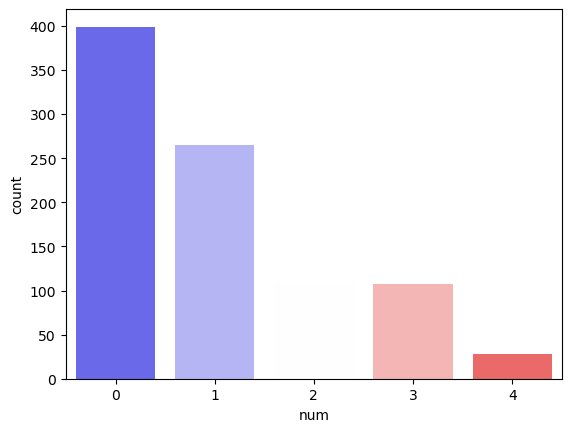

In [8]:
sns.countplot(x="num", data=df, palette="bwr")
plt.show()

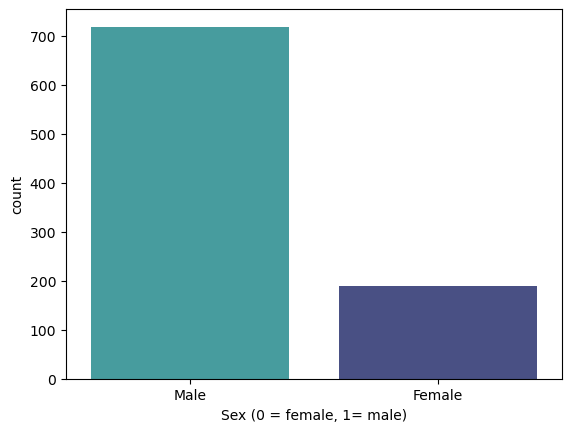

In [9]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

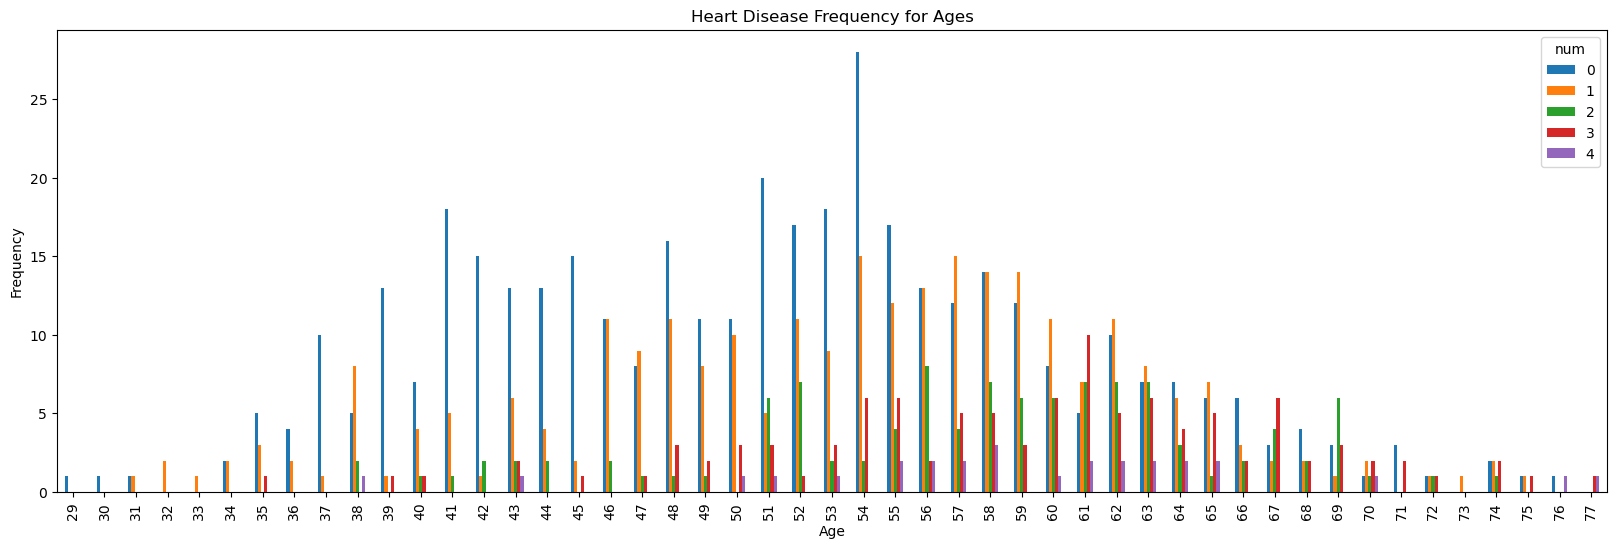

In [10]:
pd.crosstab(df.age,df.num).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

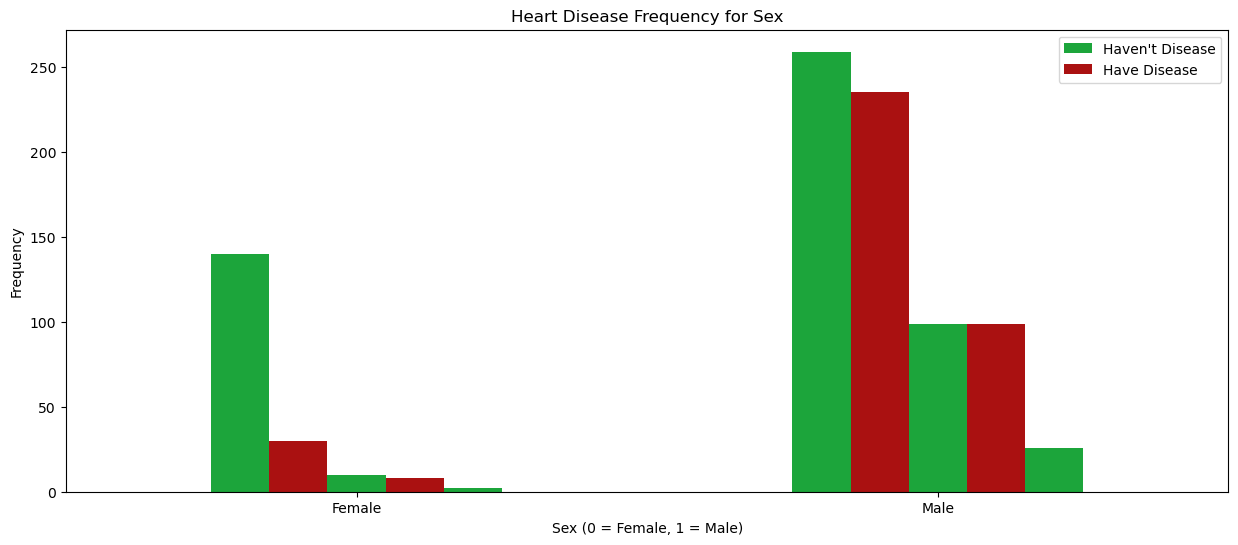

In [11]:
pd.crosstab(df.sex,df.num).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

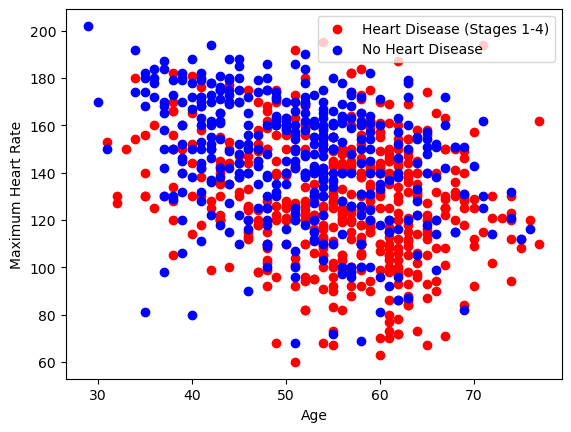

In [12]:
# Scatter plot for patients with heart disease (stages 1, 2, 3, 4)
plt.scatter(x=df.age[df.num > 0], y=df.thalch[df.num > 0], c="red")

# Scatter plot for patients without heart disease (target == 0)
plt.scatter(x=df.age[df.num == 0], y=df.thalch[df.num == 0], c="blue")

# Add legend, labels, and title
plt.legend(["Heart Disease (Stages 1-4)", "No Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


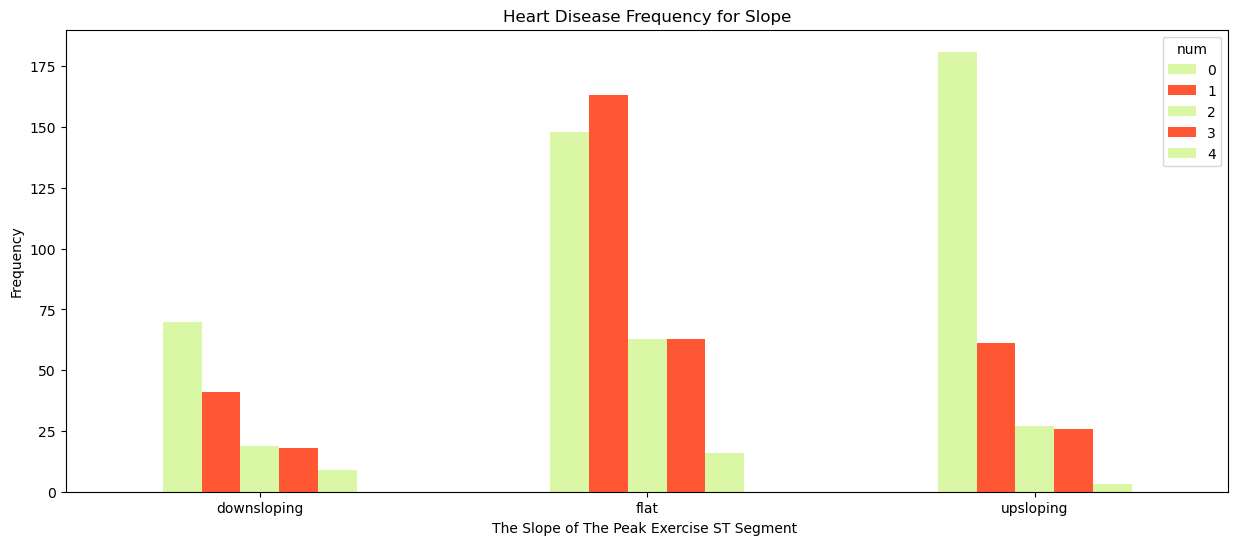

In [13]:
pd.crosstab(df.slope,df.num).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

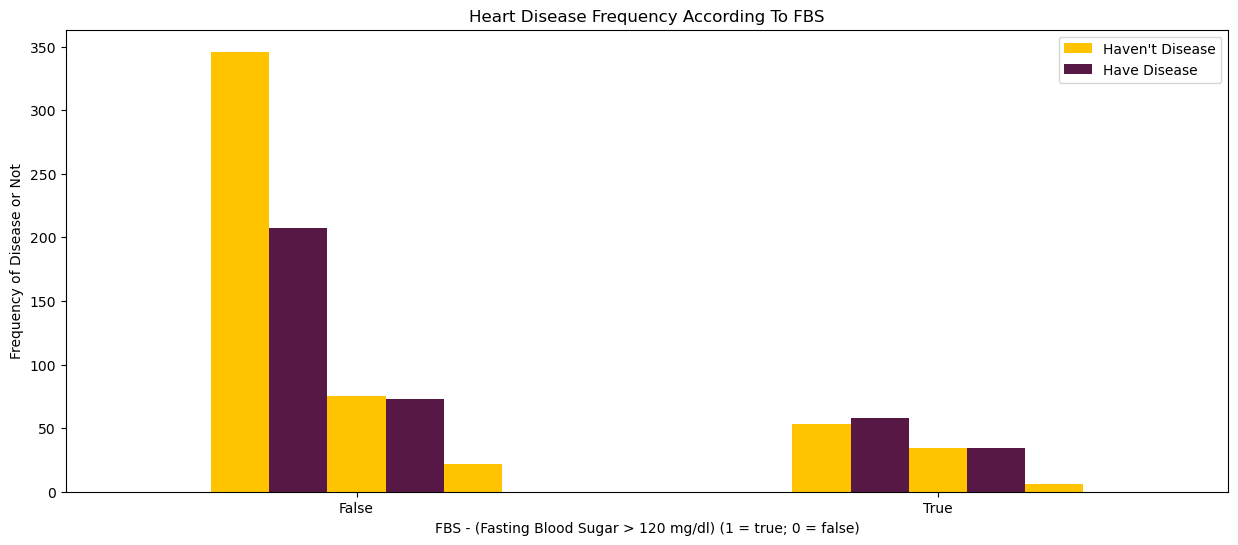

In [14]:
pd.crosstab(df.fbs,df.num).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

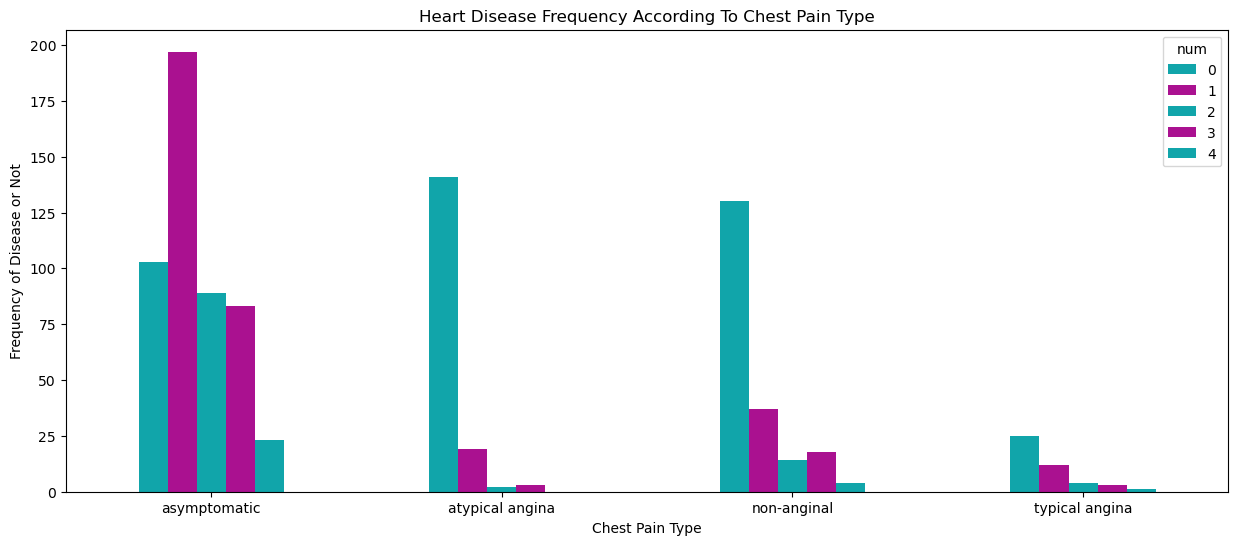

In [15]:
pd.crosstab(df.cp,df.num).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [16]:
#checking for missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

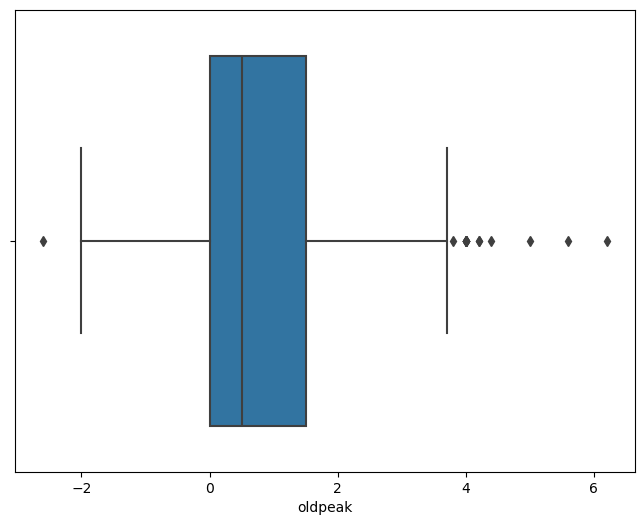

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['oldpeak'])
plt.show()

# 3) Feature Engineering

In [18]:
#filling missing values with mean values since there are not many outliers
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace = True) 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,fixed defect,4


In [19]:
df.replace({'TURE': 'True', 'true': 'True', 'TRUE': 'True'}, inplace=True)
df.replace('FALSE', 'False', inplace=True)

In [20]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,0.891253,downsloping,fixed defect,4


In [21]:
print(df['exang'].unique())
print(df['thal'].unique())
print(df['slope'].unique())
print(df['restecg'].unique())
print(df['cp'].unique())

[False True 'False' 'True']
['fixed defect' 'normal' 'reversable defect']
['downsloping' 'flat' 'upsloping']
['lv hypertrophy' 'normal' 'st-t abnormality']
['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']


In [22]:
df['exang'] = df['exang'].astype(bool)
print(df['exang'].unique())

[False  True]


In [23]:
#converting categorical variables into dummy variables
a = pd.get_dummies(df['cp'],drop_first = True,  prefix = "cp").astype(int)
b = pd.get_dummies(df['thal'],drop_first = True, prefix = "thal").astype(int)
c = pd.get_dummies(df['slope'],drop_first = True, prefix = "slope").astype(int)
d = pd.get_dummies(df['restecg'],drop_first = True, prefix = 'restecg').astype(int)
e = pd.get_dummies(df['exang'],drop_first = True, prefix = 'exang').astype(int)
f = pd.get_dummies(df['fbs'],drop_first = True, prefix = 'fbs').astype(int)
g = pd.get_dummies(df['sex'],drop_first = True, prefix = 'sex').astype(int)

In [24]:
frames = [df, a, b, c, d, e, f, g]
df2 = pd.concat(frames, axis = 1)
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,...,cp_typical angina,thal_normal,thal_reversable defect,slope_flat,slope_upsloping,restecg_normal,restecg_st-t abnormality,exang_True,fbs_True,sex_Male
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,...,1,0,0,0,0,0,0,0,1,1
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,...,0,0,0,1,0,1,0,0,0,1
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,...,0,0,0,1,0,1,0,0,0,1
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,...,1,0,0,1,0,0,0,0,0,1
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,...,0,0,0,1,0,1,0,1,0,1


In [25]:
df3 = df2.drop(columns = ['cp', 'thal', 'slope', 'restecg', 'exang', 'fbs', 'sex'])
df3         

,age,trestbps,chol,thalch,oldpeak,num,cp_atypical angina,cp_non-anginal,cp_typical angina,thal_normal,thal_reversable defect,slope_flat,slope_upsloping,restecg_normal,restecg_st-t abnormality,exang_True,fbs_True,sex_Male
0,63,145,233,150,2.300000,0,0,0,1,0,0,0,0,0,0,0,1,1
1,41,135,203,132,0.000000,0,1,0,0,0,0,1,0,1,0,0,0,1
2,57,140,192,148,0.400000,0,0,0,0,0,0,1,0,1,0,0,0,1
3,52,118,186,190,0.000000,0,0,0,1,0,0,1,0,0,0,0,0,1
4,57,110,201,126,1.500000,0,0,0,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,120,1.500000,4,0,0,0,0,1,0,1,1,0,0,0,1
904,62,166,170,120,3.000000,4,0,0,0,0,1,1,0,0,1,1,0,1
905,56,170,0,123,2.500000,4,0,1,0,1,0,0,0,0,0,1,0,1
906,56,144,208,105,0.891253,4,0,1,0,0,0,0,0,0,1,1,1,1


In [26]:
df3.dtypes

age                           int64
trestbps                      int64
chol                          int64
thalch                        int64
oldpeak                     float64
num                           int64
cp_atypical angina            int32
cp_non-anginal                int32
cp_typical angina             int32
thal_normal                   int32
thal_reversable defect        int32
slope_flat                    int32
slope_upsloping               int32
restecg_normal                int32
restecg_st-t abnormality      int32
exang_True                    int32
fbs_True                      int32
sex_Male                      int32
dtype: object

# 4) Decision Tree Classification

In [27]:
x = df3.drop('num' , axis = 1)
y = df3['num']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0, stratify=y)

In [29]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
dtc.score(x_test, y_test)

0.45604395604395603

In [31]:
# hyperparameter tuning
dtc2 = DecisionTreeClassifier(max_depth = 5)
dtc2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [32]:
dtc2.score(x_test, y_test)

0.5714285714285714

In [33]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [34]:
# establishing a function to determine optimal set of hyperparameters that yeild the highest recall
def tune_dtc_hypar(dtc, param_grid, x_train, y_train, scoring ='recall', n_splits=3):
    cv = StratifiedKFold(n_splits, shuffle=True, random_state=0)
    dtc_grid = GridSearchCV(dtc, param_grid, cv=cv, scoring=scoring, n_jobs=-1)
    dtc_grid.fit(x_train, y_train)
    best_hyperparameters = dtc_grid.best_params_
    return dtc_grid.best_estimator_, best_hyperparameters

In [35]:
param_grid_dt = {'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
                }

In [36]:
best_dt , best_dt_hyperparams = tune_dtc_hypar(dtc, param_grid_dt , x_train , y_train)

C:\Users\KAUSHIK\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


In [37]:
print('Decision tree best parameters:', best_dt_hyperparams)

Decision tree best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [38]:
print(classification_report(y_train, best_dt.predict(x_train)))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       319
           1       0.41      0.67      0.51       212
           2       0.00      0.00      0.00        87
           3       0.00      0.00      0.00        86
           4       0.00      0.00      0.00        22

    accuracy                           0.56       726
   macro avg       0.22      0.30      0.25       726
weighted avg       0.43      0.56      0.48       726



C:\Users\KAUSHIK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KAUSHIK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KAUSHIK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


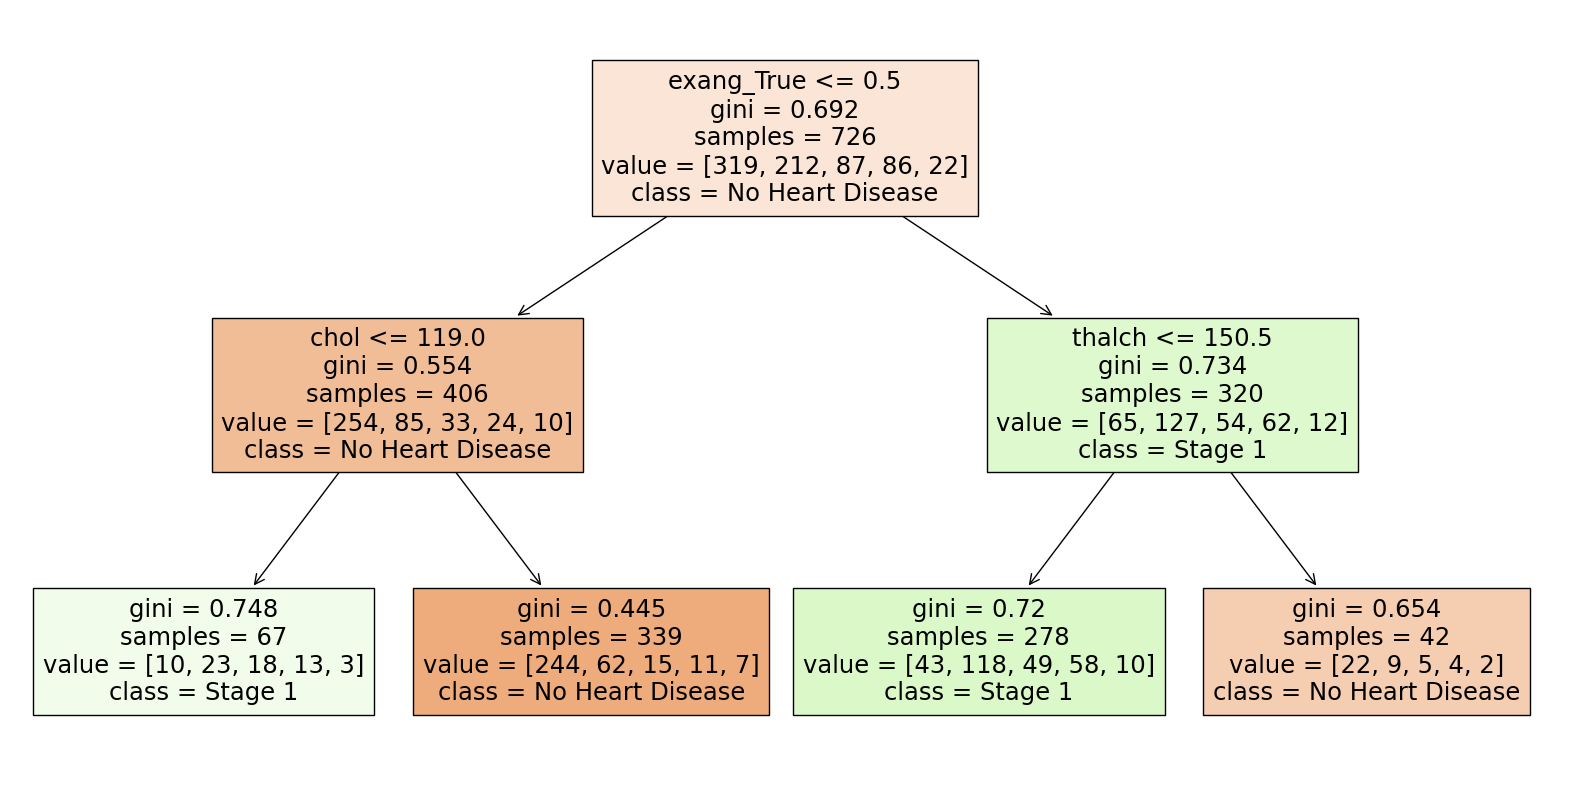

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(best_dt, filled=True, feature_names=x_train.columns, class_names=['No Heart Disease', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])
plt.show()

In [ ]:
'''
Decision Tree Hyperparameters: The best performing decision tree model was found using the gini impurity criterion, a maximum depth of 2, and minimum samples per leaf and split of 1.

Class Imbalance: The dataset exhibits significant class imbalance, with classes 2, 3, and 4 having significantly fewer samples compared to classes 0 and 1.

Model Performance: The model achieves a decent accuracy of 0.56 on the training set. However, the performance is heavily skewed towards the majority classes (0 and 1), as indicated by the precision, recall, and F1-score for these classes.

Class Disparity: The model struggles to classify the minority classes effectively, resulting in very low precision, recall, and F1-scores for classes 2, 3, and 4.

Overfitting Risk: The low maximum depth of 2 suggests a risk of underfitting, but the model's performance on the training set indicates that it might be overfitting to the majority classes.

The Decision Tree model uses Gini impurity as the splitting criterion.

Key features for prediction are exang, chol, and thalch.

The model predicts five heart disease stages.

The simple tree structure might lead to underfitting.

'''